In [1]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


import xgboost
from xgboost import XGBRegressor

import matplotlib
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

font = {'family': 'MicroSoft YaHei'}
matplotlib.rc('font', **font)  # 使支持中文

In [2]:
Act = pd.read_excel("ERα_activity.xlsx", sheet_name=0)
MD_ = pd.read_excel("Molecular_Descriptor.xlsx")
MD = pd.read_csv("MD_mRMR__.csv")

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,TopoPSA,CrippenLogP,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10
0,28.277932,0,0.469126,6.593009,9.968948,11.830949,0.546,1,0,2.516142,67.23,5.50408,0.269680,9.968948,9.238227,0.000000,3.092949,2.288,4.666,0.000000
1,31.076748,0,0.449126,6.674642,10.058948,13.149974,0.546,1,0,2.521244,67.23,6.28428,0.269680,10.058948,9.238227,0.000000,2.997752,2.288,5.804,0.000000
2,30.901064,0,0.997247,6.502751,9.752886,10.577177,1.089,1,0,2.484448,87.46,6.11878,0.495846,19.730394,10.328977,9.842059,3.125957,2.901,2.964,4.688339
3,30.570001,0,0.456486,6.622142,10.025028,13.212767,0.546,1,0,2.519774,67.23,6.28428,0.269680,10.025028,8.529910,0.000000,3.022916,2.288,6.015,0.000000
4,30.570001,0,0.473631,6.552810,9.993342,12.489691,0.546,1,0,2.504217,67.23,5.55658,0.269680,9.993342,8.529910,0.000000,3.103616,2.603,4.462,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0,1.014091,6.299676,9.808143,10.292932,1.089,3,2,0.000000,119.90,6.07537,1.933548,19.671114,17.109186,17.160557,0.000000,3.627,2.526,2.986389
1970,45.421854,0,2.095765,6.260832,9.696786,7.884092,2.175,3,2,0.000000,141.90,5.46937,1.906625,39.000194,17.109186,17.177035,0.000000,3.901,1.884,2.974232
1971,44.466435,0,2.118206,6.247428,9.645181,7.965074,2.175,3,2,0.000000,141.90,5.46937,1.850440,38.871608,16.351392,23.334095,0.000000,3.901,1.884,2.956091
1972,32.179316,0,1.065131,6.182281,9.668706,6.236558,1.089,3,2,0.000000,101.44,4.17938,1.666336,19.375230,13.747820,17.182692,0.000000,2.841,0.782,2.970346


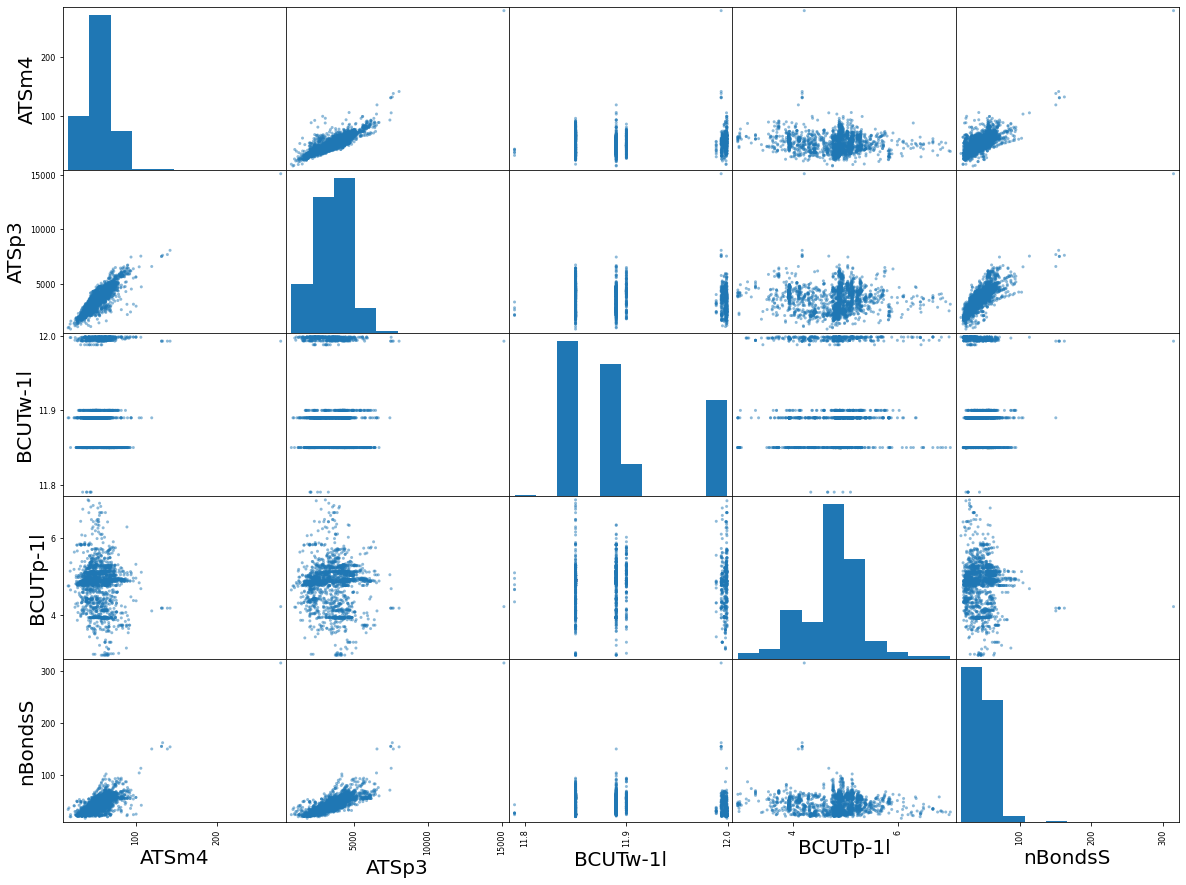

In [206]:
from pandas.plotting import scatter_matrix

attributes = MD_.columns[30:50:4]
scatter_matrix(MD_[attributes],figsize=(20,15))
plt.savefig("预处理分析.png")

In [3]:
x = MD.values
y = Act.iloc[:, 2].values
x_ = preprocessing.scale(x)
x_train_, x_test_, y_train, y_test = train_test_split(x_,y,train_size=0.95,test_size=0.05)
x.shape

(1974, 20)

In [4]:
def performance_metric(y_true, y_predict):
    score = -r2_score(y_true,y_predict)
    return score

def fit_model(x, y):
    cross_validator = KFold(n_splits=5,shuffle=True, random_state=42) #交叉验证
    gbrt = GradientBoostingRegressor(loss='ls',random_state=42,max_features=None,min_samples_leaf=10, min_impurity_split=10,learning_rate=0.06)
    params = {'max_depth':range(1,30,5), 'n_estimators':range(50,500,50), 'learning_rate': [0.06, 0.12,1.28, 2.56]}  
    scoring_fnc = make_scorer(performance_metric)   # 评分函数
    grid = GridSearchCV(gbrt,params,cv=cross_validator,scoring=scoring_fnc)
    # 基于输入数据 [x,y]，进行网格搜索
    grid = grid.fit(x, y)
    # 返回网格搜索后的最优模型
    return grid.best_estimator_

使用GBRT,R2 = 0.7210948716227066
使用GBRT,MSE = 0.5960740550592004
使用GBRT,RMSE = 0.7720583236124071


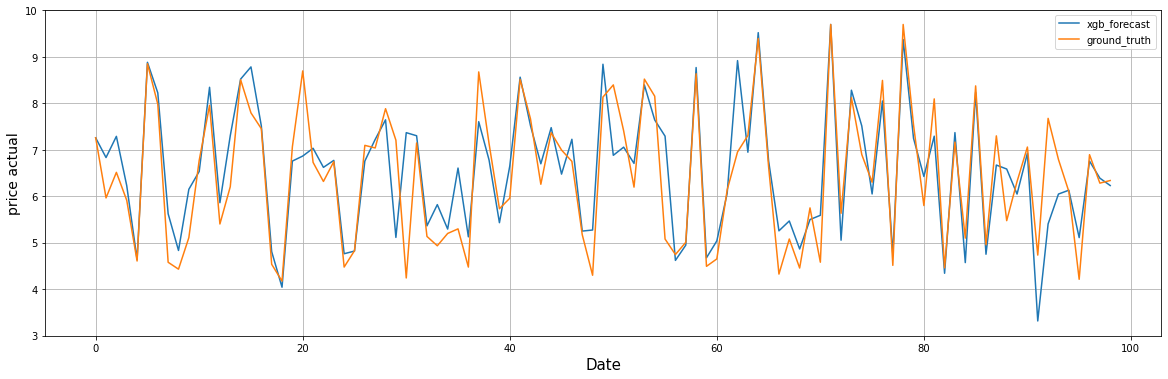

In [6]:
params = {
'n_estimators': 2000, 
'max_depth': 9,
'learning_rate': 0.06,
 'loss': 'ls',
 }

gbrt = GradientBoostingRegressor(**params)
gbrt.fit(x_train_, y_train)
y_predict_gbrt = gbrt.predict(x_test_)
r2 = performance_metric(y_test,y_predict_gbrt) 
mse = mean_squared_error(y_test,y_predict_gbrt)
rmse = sqrt(mean_squared_error(y_test,y_predict_gbrt))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
ax.grid(True)
line1, = ax.plot(y_predict_gbrt,label='xgb_forecast')
line2, =ax.plot(y_test,label='ground_truth')

ax.set_xlabel(xlabel='Date', fontsize=15)
ax.set_ylabel(ylabel='price actual', fontsize=14)
print(f"使用GBRT,R2 = {-r2}")
print(f"使用GBRT,MSE = {mse}")
print(f"使用GBRT,RMSE = {rmse}")
plt.legend()
plt.show()

使用随机森林,R2 = 0.8392479783486939
使用随机森林,MSE = 0.38118936502571893
使用随机森林,RMSE = 0.6174053490420365


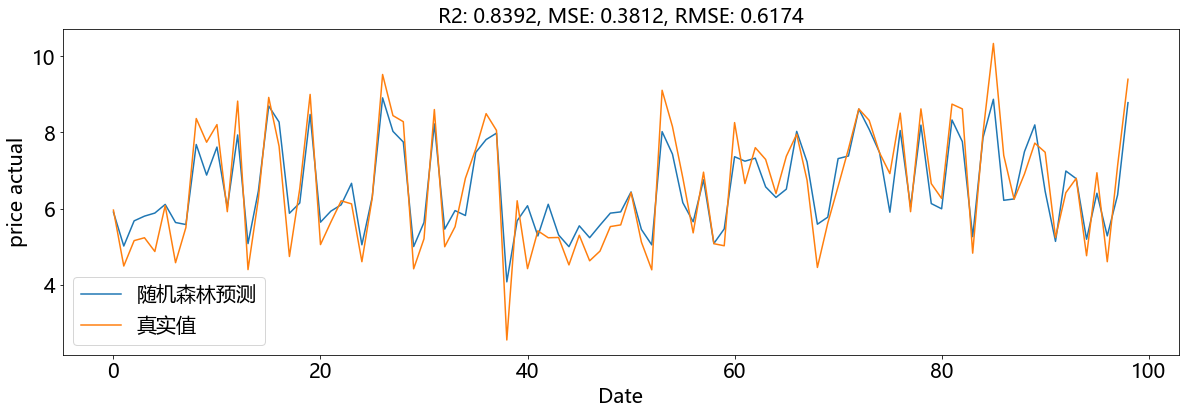

In [43]:
# rf = RandomForestRegressor(n_estimators = 100, max_leaf_nodes= 16, max_depth = 20)
rf = RandomForestRegressor(n_estimators = 1000, max_leaf_nodes= 11,max_depth = 4)
rf.fit(x_test_, y_test)

# rf.fit(x_train_, y_train) 
y_predict_rf = rf.predict(x_test_) #0.7934
r2 = performance_metric(y_test, y_predict_rf) 
mse = mean_squared_error(y_test, y_predict_rf)
rmse = sqrt(mean_squared_error(y_test, y_predict_rf))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(y_predict_rf,label='随机森林预测')
line2, =ax.plot(y_test,label='真实值')
# ax.set_title(f'RF_Prediction \n  R2: {0.7537041747098276:.4f}, MSE: {0.49789443245036036:.4f}, RMSE: {0.7033470852018702:.4f}', fontsize=20)
ax.set_title(f'R2: {-r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}', fontsize=20)
ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize=20)
print(f"使用随机森林,R2 = {-r2}")
print(f"使用随机森林,MSE = {mse}")
print(f"使用随机森林,RMSE = {rmse}")

plt.legend(fontsize=20)
plt.savefig("随机森林.jpg", dpi = 300)
plt.show()

使用支持向量回归,R2 = 0.7678372113257448
使用支持向量回归,MSE = 0.5505248710918497
使用支持向量回归,RMSE = 0.7419736323427198


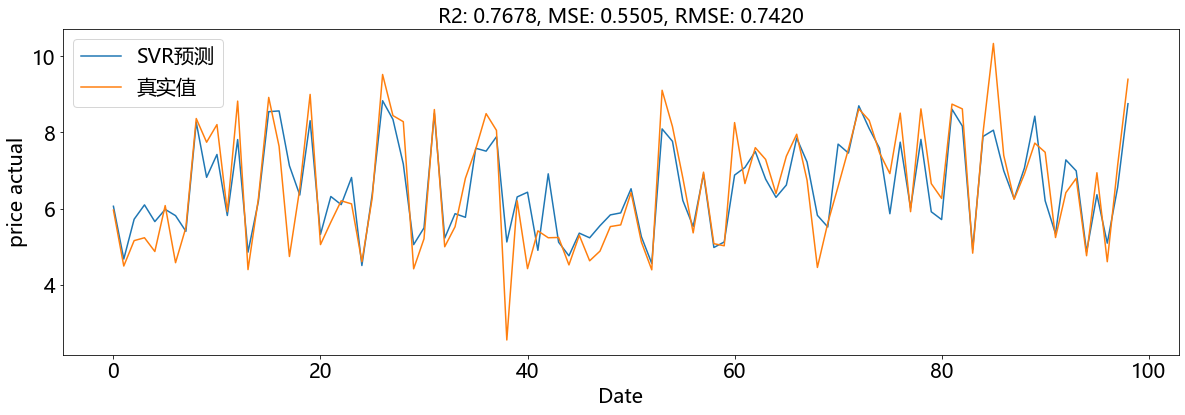

In [32]:
svr = SVR(kernel='rbf')
# svr.fit(x_train_, y_train) #0.7735

svr.fit(x_test_, y_test)

y_predict_svr = svr.predict(x_test_)
r2 = performance_metric(y_test,y_predict_svr) 
mse = mean_squared_error(y_test, y_predict_svr)
rmse = sqrt(mean_squared_error(y_test,y_predict_svr))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(y_predict_svr,label='SVR预测')
line2, =ax.plot(y_test,label='真实值')

# ax.set_title(f'SVR_Prediction \n  R2: {0.7200379972370626:.4f}, MSE: {0.5582423167502784:.4f},  RMSE: {0.7463336366859257:.4f}', fontsize=20)
ax.set_title(f'R2: {-r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}', fontsize=20)
ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize=20)
print(f"使用支持向量回归,R2 = {-r2}")
print(f"使用支持向量回归,MSE = {mse}")
print(f"使用支持向量回归,RMSE = {rmse}")

plt.legend(fontsize=20)
plt.savefig('SVR.jpg',dpi = 300)
plt.show()

使用人工神经网络,R2 = 0.7706755851318646
使用人工神经网络,RMSE = 0.7374240767038673
训练,R2 = 0.7692162040344513
训练,MSE = 0.46284256233718796
训练,RMSE = 0.680325335657278


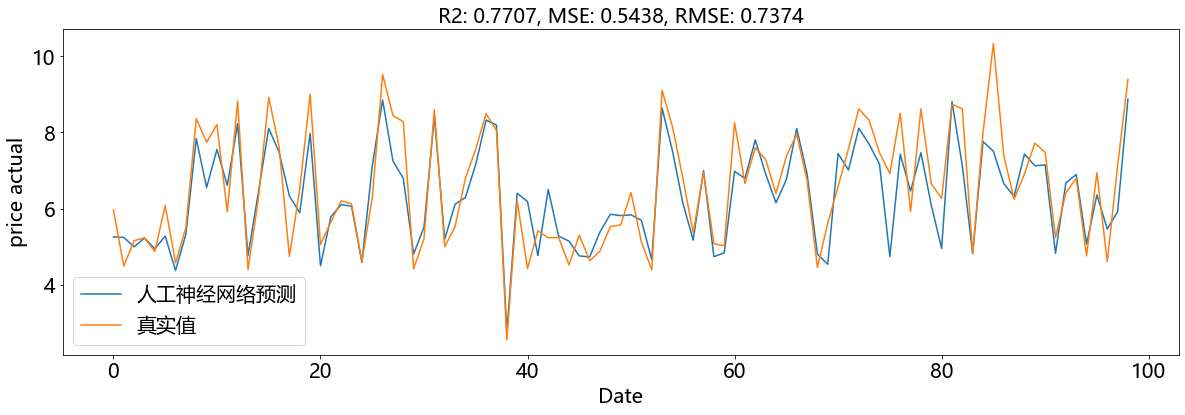

In [33]:
ann = MLPRegressor(solver='adam', alpha=0.001, hidden_layer_sizes=(8,20,8), activation='relu', max_iter=5000)

# ann.fit(x_train_, y_train)
ann.fit(x_, y)
y_predict_ann = ann.predict(x_test_)
r2 = performance_metric(y_test,y_predict_ann) 
rmse = sqrt(mean_squared_error(y_test,y_predict_ann))
mse = mean_squared_error(y_test,y_predict_ann)

y_predict_train = ann.predict(x_train_)
r2_train = performance_metric(y_train,y_predict_train) 
mse_train = mean_squared_error(y_train,y_predict_train)
rmse_train = sqrt(mean_squared_error(y_train,y_predict_train))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(y_predict_ann,label='人工神经网络预测')
line2, =ax.plot(y_test,label='真实值')

# ax.set_title(f'ANN_Prediction \n  R2: {0.6152839546947539:.4f}, MSE: {0.7640955999676771:.4f}, RMSE: {rmse:.4f}', fontsize=20)
ax.set_title(f'R2: {-r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}', fontsize=20)
ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize=20)
print(f"使用人工神经网络,R2 = {-r2}")
print(f"使用人工神经网络,RMSE = {rmse}")
print(f"训练,R2 = {-r2_train}")
print(f"训练,MSE = {mse_train}")
print(f"训练,RMSE = {rmse_train}")
plt.legend(fontsize=20)
plt.savefig('ANN.jpg',dpi = 300)
plt.show()

使用决策树回归,R2 = 0.529350715489417
使用决策树回归,RMSE = 1.0152450725668578


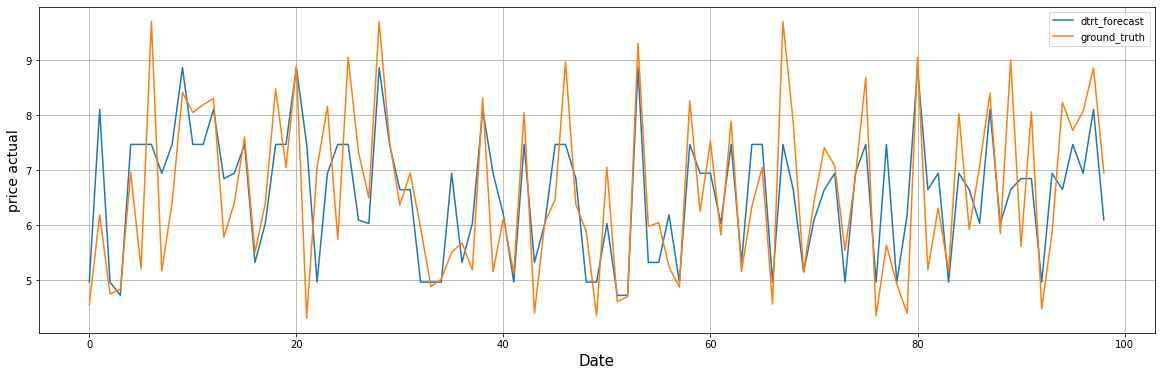

In [123]:
dtrt = DecisionTreeRegressor(max_depth=4,min_samples_leaf=1)
dtrt.fit(x_train_, y_train)
y_predict_dtrt = dtrt.predict(x_test_)
r2 = performance_metric(y_test,y_predict_dtrt) 
rmse = sqrt(mean_squared_error(y_test,y_predict_dtrt))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
ax.grid(True)
line1, = ax.plot(y_predict_dtrt,label='dtrt_forecast')
line2, =ax.plot(y_test,label='ground_truth')

ax.set_xlabel(xlabel='Date', fontsize=15)
ax.set_ylabel(ylabel='price actual', fontsize=14)
print(f"使用决策树回归,R2 = {-r2}")
print(f"使用决策树回归,RMSE = {rmse}")
plt.legend()
plt.show()

使用xgbt回归,R2 = 0.8159348047110134
使用xgbt回归,RMSE = 0.6606599863439638


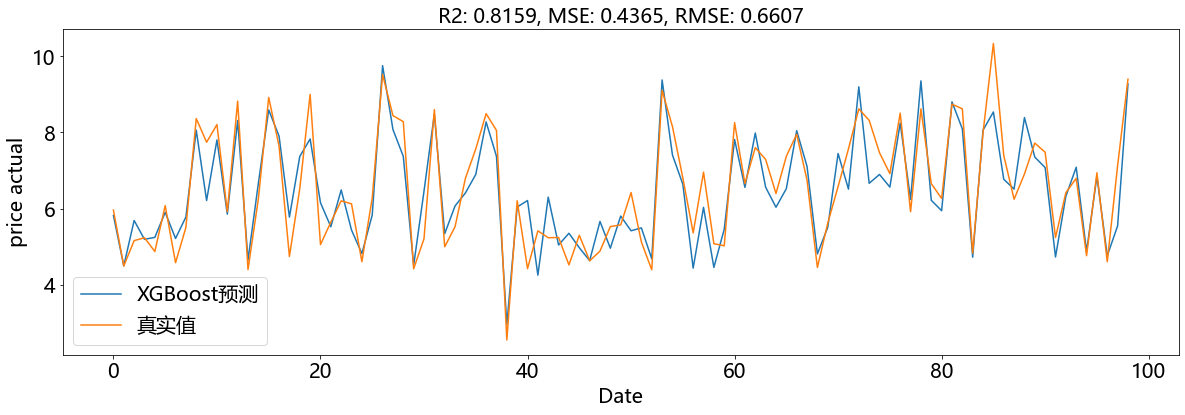

In [48]:
xgbt = XGBRegressor(n_estimators = 500, max_depth = 2, subsample= 0.1)
xgbt.fit(x_, y) #0.676

y_predict_xgbt = xgbt.predict(x_test_)
r2 = performance_metric(y_test,y_predict_xgbt) 
rmse = sqrt(mean_squared_error(y_test,y_predict_xgbt))
mse = mean_squared_error(y_test,y_predict_xgbt)
plt.rcParams.update({"font.size":20})
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(y_predict_xgbt,label='XGBoost预测')
line2, =ax.plot(y_test,label='真实值')


# ax.set_title(f'XGBoost_Prediction \n  R2: {0.7132326595407001:.4f}, MSE: {0.578334161114743:.4f}, RMSE: {0.7580021847314099:.4f}', fontsize=20)
ax.set_title(f'R2: {-r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}', fontsize=20)
ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize = 20)
print(f"使用xgbt回归,R2 = {-r2}")
print(f"使用xgbt回归,RMSE = {rmse}")

plt.legend(fontsize=20)
plt.savefig('xgboost.jpg',dpi = 300)
plt.show()

使用集成学习,R2 = 0.8619247878947818
使用集成学习,MSE = 0.32741611512885116
使用集成学习,RMSE = 0.5722028618670577


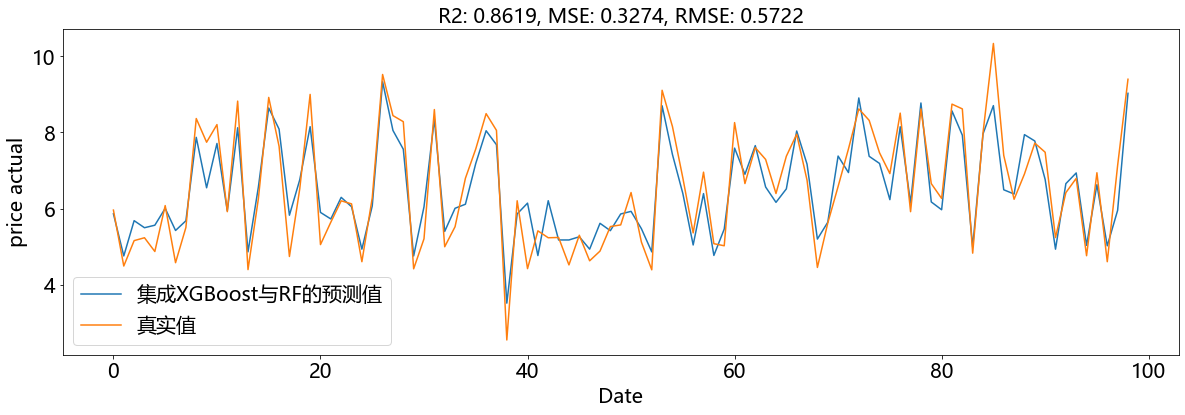

In [47]:
y_ensemble = (y_predict_rf +  y_predict_xgbt)/2

r2 = performance_metric(y_test,y_ensemble) 
mse = mean_squared_error(y_test,y_ensemble)
rmse = sqrt(mean_squared_error(y_test,y_ensemble))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(y_ensemble ,label='集成XGBoost与RF的预测值')
line2, =ax.plot(y_test,label='真实值')

ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize=20)
print(f"使用集成学习,R2 = {-r2}")
print(f"使用集成学习,MSE = {mse}")
print(f"使用集成学习,RMSE = {rmse}")
ax.set_title(f'R2: {-r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}', fontsize=20)

plt.legend(fontsize=20)
plt.savefig('集成.jpg',dpi = 300)

plt.legend()
plt.show()

In [60]:
##交叉验证
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=10,shuffle=True)
rf = RandomForestRegressor(n_estimators = 1000)
svr = SVR(kernel='rbf')
ann = MLPRegressor(solver='adam', alpha=0.001, hidden_layer_sizes=(30,80,30), activation='relu', max_iter=5000)
xgbt = XGBRegressor(n_estimators = 500)

model = svr

R2 = []
MSE = []
RMSE = []
Y_ = y
X_ = x_
for train_index,test_index in kf.split(X_):
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    model.fit(train_X, train_y)
    predit_y = model.predict(test_X)
    r2 = performance_metric(test_y, predit_y)
    mse = mean_squared_error(test_y, predit_y)
    rmse = sqrt(mean_squared_error(test_y, predit_y))
    R2.append(-r2)
    MSE.append(mse)
    RMSE.append(rmse)
print(R2)
print(f'平均R2是{np.mean(R2)},平均MSE是{np.mean(MSE)},平均值RMS是{np.mean(RMSE)}')

[0.7032887399111395, 0.7130491433103939, 0.7834858506389468, 0.7152238599508509, 0.7413301304203199, 0.6831394359560885, 0.7055649227169989, 0.7296571759903201, 0.6460425186378711, 0.7795981948376971]
平均R2是0.7200379972370626,平均MSE是0.5582423167502784,平均值RMS是0.7463336366859257


In [75]:
##交叉验证
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=10,shuffle=True)
rf = RandomForestRegressor(n_estimators = 1000)
svr = SVR(kernel='rbf')
ann = MLPRegressor(solver='adam', alpha=0.001, hidden_layer_sizes=(30,80,30), activation='relu', max_iter=5000)
xgbt = XGBRegressor(n_estimators = 500)

model1 = rf
model2 = svr

R2 = []
MSE = []
RMSE = []
Y_ = y
X_ = x_
for train_index,test_index in kf.split(X_):
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    model1.fit(train_X, train_y)
    predit_y1 = model1.predict(test_X)
    model2.fit(train_X, train_y)
    predit_y2 = model2.predict(test_X)

    predit_y = (predit_y1 + predit_y2)/2

    r2 = performance_metric(test_y, predit_y)
    mse = mean_squared_error(test_y, predit_y)
    rmse = sqrt(mean_squared_error(test_y, predit_y))
    R2.append(-r2)
    MSE.append(mse)
    RMSE.append(rmse)
print(R2)
print(f'平均R2是{np.mean(R2)},平均MSE是{np.mean(MSE)},平均值RMS是{np.mean(RMSE)}')

[0.741919149602688, 0.7127025184590328, 0.809629290043715, 0.764139090671689, 0.7482924234867461, 0.7247480545860367, 0.7191720082048738, 0.7848084065131713, 0.8059906931694756, 0.7166692746384613]
平均R2是0.7528070909375888,平均MSE是0.4966357795978227,平均值RMS是0.7030344795090185


In [29]:
model = SVR('rbf')
c_can = np.logspace(-2, 2, 10)
gamma_can = np.logspace(-2, 2, 10)

svr_grid = GridSearchCV(model, param_grid={'C': c_can, 'gamma': gamma_can}, cv=5)
svr_grid.fit(x_train_,y_train)
print ('验证参数：\n',svr_grid.best_params_)

验证参数：
 {'C': 4.6415888336127775, 'gamma': 0.0774263682681127}


In [53]:
cv_params = {'n_estimators': np.linspace(50, 80, 100, dtype=int)}
other_params = {'eta': 0.3, 'n_estimators': 500, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}
model = XGBRegressor(**other_params)
optimized_XGB = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_XGB.fit(x_train_, y_train)


print ('验证参数：\n',optimized_XGB.best_params_)
print ('得分：\n',optimized_XGB.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
验证参数：
 {'n_estimators': 50}
得分：
 nan


D:\anaconda3\envs\pytorch\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


使用xgbt回归,R2 = 0.5898841207525649
使用xgbt回归,RMSE = 0.9362140448805244


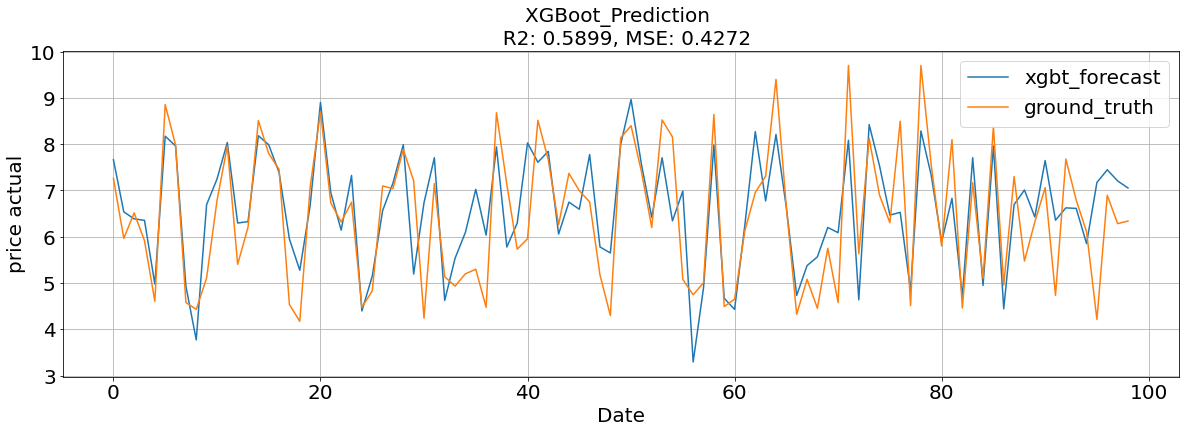

In [80]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train_,y_train)

y_predict_lin = lin.predict(x_test_)
r2 = performance_metric(y_test,y_predict_lin) 
rmse = sqrt(mean_squared_error(y_test,y_predict_lin))
plt.rcParams.update({"font.size":20})
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
ax.grid(True)
line1, = ax.plot(y_predict_lin,label='xgbt_forecast')
line2, =ax.plot(y_test,label='ground_truth')


ax.set_title(f'XGBoot_Prediction \n  R2: {-r2:.4f}, MSE: {mse:.4f}', fontsize=20)
ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize = 20)
print(f"使用xgbt回归,R2 = {-r2}")
print(f"使用xgbt回归,RMSE = {rmse}")

plt.legend()
plt.savefig('xgboost.png')
plt.show()

使用随机森林,R2 = 0.8469871600613336
使用随机森林,MSE = 0.3086052180440128
使用随机森林,RMSE = 0.5555224730323813


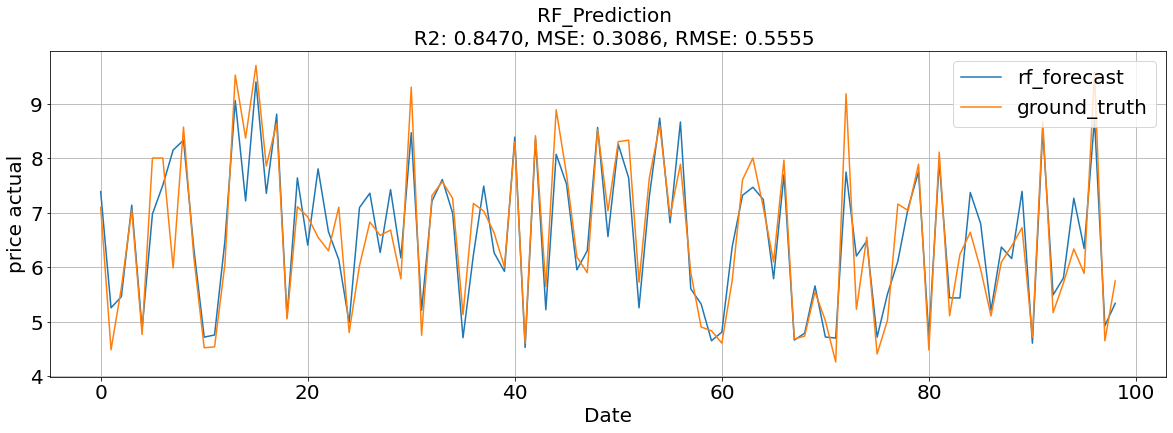

In [199]:

rf = RandomForestRegressor(n_estimators = 1000)

X_train, X_test, Y_train, Y_test = train_test_split(x_,y,train_size=0.95,test_size=0.05)

rf.fit(X_train, Y_train) 
y_predict_rf = rf.predict(X_test) #0.7934
r2 = performance_metric(Y_test, y_predict_rf) 
mse = mean_squared_error(Y_test, y_predict_rf)
rmse = sqrt(mean_squared_error(Y_test, y_predict_rf))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
ax.grid(True)
line1, = ax.plot(y_predict_rf,label='rf_forecast')
line2, =ax.plot(Y_test,label='ground_truth')
ax.set_title(f'RF_Prediction \n  R2: {-r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}', fontsize=20)
ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize=20)
print(f"使用随机森林,R2 = {-r2}")
print(f"使用随机森林,MSE = {mse}")
print(f"使用随机森林,RMSE = {rmse}")

plt.legend()
# plt.savefig("随机森林")
plt.show()

使用支持向量回归,R2 = 0.82367254324161
使用支持向量回归,MSE = 0.35562749676354666
使用支持向量回归,RMSE = 0.596345115485611


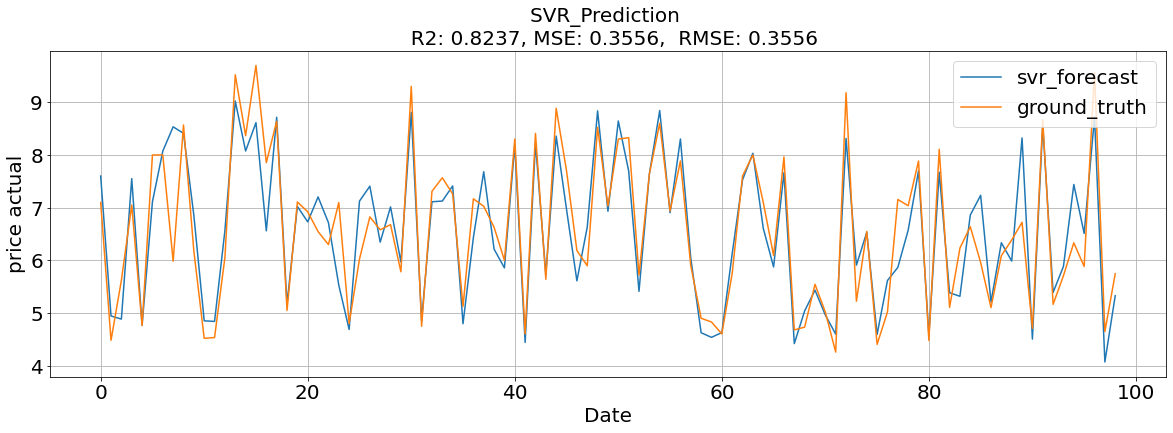

In [207]:
svr = SVR(kernel='rbf')
svr.fit(X_train, Y_train) 


y_predict_svr = svr.predict(X_test)
r2 = performance_metric(Y_test,y_predict_svr) 
mse = mean_squared_error(Y_test, y_predict_svr)
rmse = sqrt(mean_squared_error(Y_test,y_predict_svr))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
ax.grid(True)
line1, = ax.plot(y_predict_svr,label='svr_forecast')
line2, =ax.plot(Y_test,label='ground_truth')

ax.set_title(f'SVR_Prediction \n  R2: {-r2:.4f}, MSE: {mse:.4f},  RMSE: {mse:.4f}', fontsize=20)

ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize=20)
print(f"使用支持向量回归,R2 = {-r2}")
print(f"使用支持向量回归,MSE = {mse}")
print(f"使用支持向量回归,RMSE = {rmse}")

plt.legend()
# plt.savefig('SVR.png')
plt.show()

R2 = 0.7070219549238941
MSE = 0.6786782633922797
RMSE = 0.8238193147725292


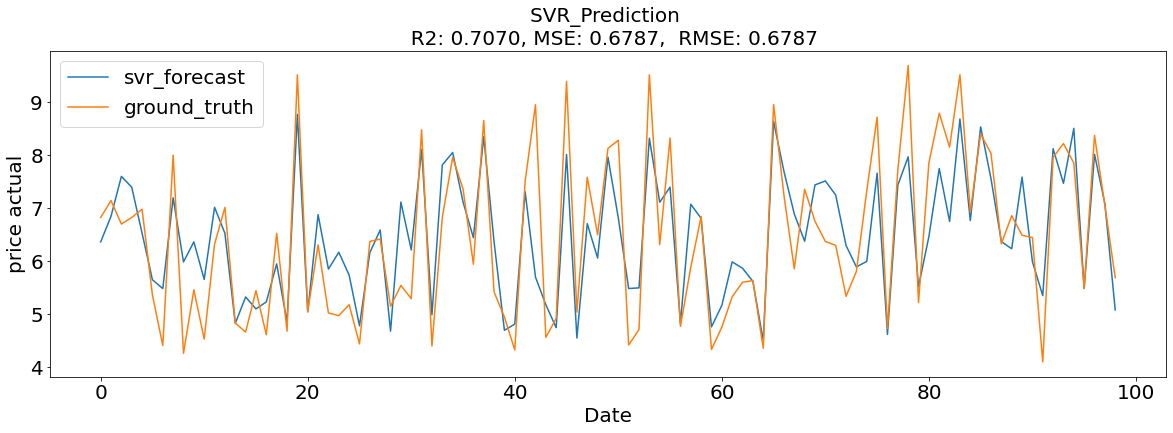

In [241]:
x = MD.values
# x_ = preprocessing.scale(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size=0.95,test_size=0.05,random_state=2)

M1 = RandomForestRegressor(n_estimators = 1000)
M2 = SVR(kernel='rbf')
M1.fit(X_train, Y_train) 
M2.fit(X_train, Y_train)
Y_pre1 = M1.predict(X_test)
Y_pre2 = M2.predict(X_test)

Y_pre = (Y_pre1 + Y_pre2)/2
r2 = performance_metric(Y_test,Y_pre) 
mse = mean_squared_error(Y_test, Y_pre)
rmse = sqrt(mean_squared_error(Y_test,Y_pre))

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(Y_pre,label='svr_forecast')
line2, =ax.plot(Y_test,label='ground_truth')

ax.set_title(f'SVR_Prediction \n  R2: {-r2:.4f}, MSE: {mse:.4f},  RMSE: {mse:.4f}', fontsize=20)

ax.set_xlabel(xlabel='Date', fontsize=20)
ax.set_ylabel(ylabel='price actual', fontsize=20)
print(f"R2 = {-r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")

plt.legend()
# plt.savefig('SVR.png')
plt.show()

In [246]:
#读取测试集
TEST = pd.read_excel("Molecular_Descriptor.xlsx", sheet_name=1)
test = TEST[MD.columns]
X_test_ = test.values
X_total = np.r_[X_test_ ,x]
Y_train = Act.iloc[:, 2].values
print(X_total.shape,len(Y_train))

(2024, 20) 1974


In [247]:
#标准化
X_total_scaled = preprocessing.scale(X_total)
X_test = X_total_scaled[0:50]
X_train = X_total_scaled[50:]
print(X_test.shape, X_train.shape)

(50, 20) (1974, 20)


In [248]:
#最终模型
M1 = RandomForestRegressor(n_estimators = 1000)
M2 = SVR(kernel='rbf')

M1.fit(X_train, Y_train) 
M2.fit(X_train, Y_train)

Y_pre1 = M1.predict(X_test)
Y_pre2 = M2.predict(X_test)

Y_pre = (Y_pre1 + Y_pre2)/2

In [249]:
Y_pre 

array([7.38588871, 7.51361201, 7.62631883, 7.66356612, 7.57531888,
       7.43900175, 7.83193824, 7.59637892, 7.42939056, 7.3612648 ,
       7.33515566, 7.2625635 , 7.55242418, 7.13111506, 7.17506346,
       7.40362956, 7.02728892, 7.07764294, 7.2430279 , 7.99646094,
       7.07115183, 7.07052691, 6.34089531, 6.41879413, 5.97637913,
       5.88153011, 7.26758371, 6.46427598, 5.92947336, 5.90693583,
       5.23772686, 5.30505062, 5.17139675, 5.0254595 , 5.10848388,
       6.23935472, 6.22403171, 6.38560497, 6.11045759, 6.20436849,
       6.19881429, 6.19905928, 6.20061569, 6.19815784, 6.19881429,
       7.42595456, 7.31584612, 7.30942245, 6.91587975, 8.25276304])

In [240]:
test.head()

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,TopoPSA,CrippenLogP,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10
0,44.466435,0,1.019501,6.281369,9.793792,10.371184,1.089,3,2,0.0,119.90,6.07537,1.867188,19.639753,16.351392,17.09696,0.0,3.627,2.526,2.964494
1,37.917748,1,1.234713,5.996806,8.828071,9.079538,1.134,2,3,0.0,66.76,4.99117,0.303270,18.510490,9.967918,0.00000,0.0,2.523,3.681,0.000000
2,39.275746,1,1.224351,6.059306,8.860576,9.155849,1.134,2,3,0.0,75.99,4.99977,0.544033,18.586779,11.577346,0.00000,0.0,2.646,3.710,0.000000
3,39.275746,1,1.240736,5.837639,8.819839,9.398003,1.134,2,3,0.0,66.76,5.13027,0.303270,18.491124,11.577346,0.00000,0.0,2.536,3.586,0.000000
4,39.275746,1,1.218588,0.000000,8.839644,9.762358,1.134,2,3,0.0,82.83,5.84357,0.000000,18.546136,11.577346,0.00000,0.0,2.540,3.978,0.000000


In [238]:
MD

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,TopoPSA,CrippenLogP,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10
0,28.277932,0,0.469126,6.593009,9.968948,11.830949,0.546,1,0,2.516142,67.23,5.50408,0.269680,9.968948,9.238227,0.000000,3.092949,2.288,4.666,0.000000
1,31.076748,0,0.449126,6.674642,10.058948,13.149974,0.546,1,0,2.521244,67.23,6.28428,0.269680,10.058948,9.238227,0.000000,2.997752,2.288,5.804,0.000000
2,30.901064,0,0.997247,6.502751,9.752886,10.577177,1.089,1,0,2.484448,87.46,6.11878,0.495846,19.730394,10.328977,9.842059,3.125957,2.901,2.964,4.688339
3,30.570001,0,0.456486,6.622142,10.025028,13.212767,0.546,1,0,2.519774,67.23,6.28428,0.269680,10.025028,8.529910,0.000000,3.022916,2.288,6.015,0.000000
4,30.570001,0,0.473631,6.552810,9.993342,12.489691,0.546,1,0,2.504217,67.23,5.55658,0.269680,9.993342,8.529910,0.000000,3.103616,2.603,4.462,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0,1.014091,6.299676,9.808143,10.292932,1.089,3,2,0.000000,119.90,6.07537,1.933548,19.671114,17.109186,17.160557,0.000000,3.627,2.526,2.986389
1970,45.421854,0,2.095765,6.260832,9.696786,7.884092,2.175,3,2,0.000000,141.90,5.46937,1.906625,39.000194,17.109186,17.177035,0.000000,3.901,1.884,2.974232
1971,44.466435,0,2.118206,6.247428,9.645181,7.965074,2.175,3,2,0.000000,141.90,5.46937,1.850440,38.871608,16.351392,23.334095,0.000000,3.901,1.884,2.956091
1972,32.179316,0,1.065131,6.182281,9.668706,6.236558,1.089,3,2,0.000000,101.44,4.17938,1.666336,19.375230,13.747820,17.182692,0.000000,2.841,0.782,2.970346
